# Verify that full QC was not run

So we do not know to what extent the QC procedure was run through as some filters seem to have been applied.

Since I already computed the allele counts for the bgen data I would like to check if the variant missingness filter had been applied. I can check if there are any variants missing from more than 10% of haplotypes.

In [1]:
PROJECT_LOC="~/wkspce/UKBB_500k_exome/"
RAND_SEED=19890418
DATA_OUT="/mnt/speliotes-lab/Projects/UK_ATLAS/IndivProj/craut/UKBB_500k_exome/"
DATA_IN="/mnt/speliotes-lab/Projects/UK_ATLAS/GENODATA/Exomechip_10_13_2022/BGEN/"

import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

np.random.seed(RAND_SEED)

plink_chr_ac = [8,21,22]
CHROMOS = list(range(1,22+1))

In [2]:
all_counts = pd.DataFrame()
for chrom in CHROMOS:
    bgen_cnts = pd.read_table(DATA_OUT+"bgen_allele_counts_take2/chr{}/ukbb_500k_exome.gcount".format(chrom))
    if all_counts.empty:
        all_counts = bgen_cnts
    else:
        all_counts = pd.concat([all_counts, bgen_cnts])
print(all_counts.shape)
all_counts

(26388327, 10)


,#CHROM,ID,REF,ALT,HOM_REF_CT,HET_REF_ALT_CTS,TWO_ALT_GENO_CTS,HAP_REF_CT,HAP_ALT_CTS,MISSING_CT
0,1,1:69026:T:G,T,G,469630,2,0,0,0,203
1,1,1:69081:G:C,G,C,462237,2438,177,0,0,4983
2,1,1:69095:T:G,T,G,469266,2,0,0,0,567
3,1,1:69134:A:G,A,G,467530,227,7,0,0,2071
4,1,1:69144:C:T,C,T,468214,2,0,0,0,1619
...,...,...,...,...,...,...,...,...,...,...
613848,22,22:50782393:C:T,C,T,469692,2,0,0,0,141
613849,22,22:50782396:A:C,A,C,469584,7,2,0,0,242
613850,22,22:50782398:C:T,C,T,469667,2,1,0,0,165
613851,22,22:50782404:C:A,C,A,469742,4,0,0,0,89


In [3]:
df = all_counts[["HOM_REF_CT","HET_REF_ALT_CTS","TWO_ALT_GENO_CTS","MISSING_CT"]]

In [4]:
n_ind = df.sum(axis=1)

In [5]:
set(n_ind)

{469835}

In [6]:
num_ind = 469835
num_hap = num_ind*2

In [7]:
missing_prop = [m/num_ind for m in all_counts.MISSING_CT]

<AxesSubplot: ylabel='Count'>

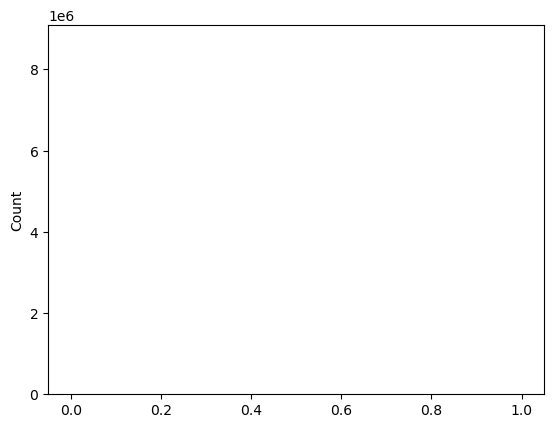

In [12]:
sns.histplot(missing_prop)

In [8]:
missing_prop.sort()

In [9]:
sorted(Counter(missing_prop).keys())[-5:]

[0.9999914863728756,
 0.9999936147796566,
 0.9999957431864378,
 0.9999978715932188,
 1.0]

In [13]:
good_variants = []
with open("/mnt/speliotes-lab/Projects/UK_ATLAS/GENODATA/Exomechip_10_13_2022/helper_files/ukb23158_500k_OQFE.90pct10dp_qc_variants.txt","r") as f:
    for line in f:
        good_variants.append(line.strip())
my_variants = list(all_counts.ID)

In [14]:
print(len(good_variants),len(my_variants))

5798366 26388327
